In [43]:
import numpy as np
import matplotlib.pyplot as plt

def actf(x): # Sigmoid 함수
    return 1.0 / (1.0 + np.exp(-x))

def actf_prime(x): # Sigmoid 함수의 도함수
    return x * (1.0 - x)

def actbin(x): # 0.5 기준 이진화 함수
    x[x >= 0.5] = 1
    x[x < 0.5] = 0
    return x

In [44]:
def predict(X, W1, W2, b1, b2):
    layer0 = X
    z1 = np.dot(layer0, W1) + b1
    layer1 = actf(z1)
    z2 = np.dot(layer1, W2) + b2
    layer2 = actf(z2)
    return layer0, layer1, layer2

In [45]:
def fit(X, W1, W2, b1, b2, T, it_max=60000):
    out = list()

    for it in range(it_max):
        layer0, layer1, layer2 = predict(X, W1, W2, b1, b2)
        layer2_error = layer2 - T

        out.append((layer2_error ** 2).mean())

        layer2_delta = layer2_error * actf_prime(layer2)
        layer1_error = np.dot(layer2_delta, W2.T)
        layer1_delta = layer1_error * actf_prime(layer1)

        W2 += -learning_rate * np.dot(layer1.T, layer2_delta) / 4.0
        W1 += -learning_rate * np.dot(layer0.T, layer1_delta) / 4.0
        b2 += -learning_rate * np.sum(layer2_delta, axis=0) / 4.0
        b1 += -learning_rate * np.sum(layer1_delta, axis=0) / 4.0

    return W1, W2, b1, b2, out

In [46]:
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

W1 = 2 * np.random.randn(inputs, hiddens)
W2 = 2 * np.random.randn(hiddens, outputs)
b1 = np.zeros(hiddens)
b2 = np.zeros(outputs)

[[-4.81027889 -5.8408639 ]
 [ 5.04413834  5.7978862 ]] [[-7.27124521]
 [ 7.49528341]] [ 2.37565521 -3.24465763] [3.39765646]
[[0.]
 [1.]
 [1.]
 [0.]]


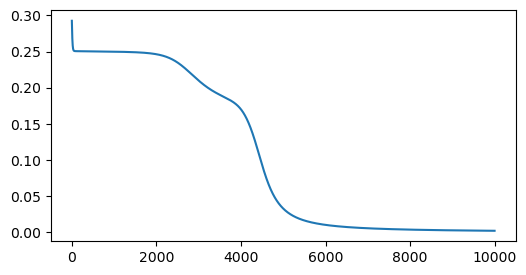

In [47]:
W1, W2, b1, b2, out = fit(X, W1, W2, b1, b2, T, 10000)
print(W1, W2, b1, b2)
_, _, layer2 = predict(X, W1, W2, b1, b2)
print(actbin(layer2))

npout = np.array(out)
plt.figure(figsize=(6, 3))
plt.plot(npout)
plt.show()